In [9]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
# Load raw data
df = pd.read_csv("FairFoodData.csv")

## 2. Descriptive Statistics P1 (Slide 3)

EDA process includes:
+ Check data shape, data types of each columns
+ Check column names.
+ Check basic statistics of numerical columns.
+ Check null values by column.
+ Check duplicated values.

Data Cleaning
+ Handle null values (if any).
+ Handle incorrect data types (if any).
+ Handle duplicated values (if any).
+ Handle data abnormality (if any).

Feature Engineering

### Check data sample, data types and data shape (Slide 3)

In [11]:
# Check data - Display first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolmentDate,Recency,CntWines,...,CntSweetProducts,CntPremiumProds,CntPremiumProds.1,NumDealsPurchases,NumWebPurchases,NumAppPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,NumCampaign
0,5524,1967,Graduation,Single,58138.0,0,0,9/4/2022,58,635,...,88,352,88,3,8,18,4,7,0,1
1,2174,1964,Graduation,Single,46344.0,1,1,2/8/2024,38,11,...,1,24,6,2,1,2,2,5,0,0
2,4141,1975,Graduation,Married,71613.0,0,0,21/08/2023,26,426,...,21,210,42,1,8,10,10,4,0,0
3,6182,1994,Graduation,Married,26646.0,1,0,1/10/2024,26,11,...,3,20,5,2,2,2,4,6,0,0
4,5324,1991,PhD,Married,58293.0,1,0,19/01/2024,94,173,...,27,120,15,5,5,8,6,5,0,0


In [12]:
# Check data - Check data type, number of columns/rows
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2237 non-null   int64  
 1   Year_Birth         2237 non-null   int64  
 2   Education          2237 non-null   str    
 3   Marital_Status     2237 non-null   str    
 4   Income             2213 non-null   float64
 5   Kidhome            2237 non-null   int64  
 6   Teenhome           2237 non-null   int64  
 7   EnrolmentDate      2237 non-null   str    
 8   Recency            2237 non-null   int64  
 9   CntWines           2237 non-null   int64  
 10  CntFruits          2237 non-null   int64  
 11  CntMeatProducts    2237 non-null   int64  
 12  CntFishProducts    2237 non-null   int64  
 13  CntSweetProducts   2237 non-null   int64  
 14  CntPremiumProds    2237 non-null   int64  
 15  CntPremiumProds.1  2237 non-null   int64  
 16  NumDealsPurchases  2237 non-null   

Note: There're 2234 rows and 23 columns in the dataset. 
+ Most columns have no null values except `Income` column.
+ Most columns have correct data types except `EnrolmentDate` column which should be datetime type.
+ Most columns are numerical which shows the purchase behaviour of customers. Categorical columns show the demographic information of customers.

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,CntWines,CntFruits,CntMeatProducts,CntFishProducts,CntSweetProducts,CntPremiumProds,CntPremiumProds.1,NumDealsPurchases,NumWebPurchases,NumAppPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,NumCampaign
count,2237.000000,2237.000000,2213.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1978.901654,52236.581563,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,241.986589,43.968708,2.326777,4.087170,6.749665,5.794367,5.319177,0.008941,0.447027
std,3245.118591,11.701917,25178.603047,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,308.384532,52.054318,1.932923,2.779461,4.734631,3.250940,2.426386,0.094152,0.890964
min,0.000000,1950.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2829.000000,1969.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,44.000000,9.000000,1.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,5455.000000,1980.000000,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,126.000000,24.000000,2.000000,4.000000,6.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.000000,1987.000000,68487.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,304.000000,56.000000,3.000000,6.000000,10.000000,8.000000,7.000000,0.000000,1.000000
max,11191.000000,2006.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,2328.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,5.000000


### Check duplicated values (Slide 3)

In [14]:
print(df.duplicated().sum())
print(df.duplicated(subset=['ID']).sum())

0
0


Note: No duplicated rows in the data set. `ID` column also doesn't have duplicated values.

### Check null values by column (Slide 3)

In [15]:
# Check data - Count null values for each column
print(df.isnull().sum())

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
EnrolmentDate         0
Recency               0
CntWines              0
CntFruits             0
CntMeatProducts       0
CntFishProducts       0
CntSweetProducts      0
CntPremiumProds       0
CntPremiumProds.1     0
NumDealsPurchases     0
NumWebPurchases       0
NumAppPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
NumCampaign           0
dtype: int64


Note: There're 24 null values in the `Income` column. We will check its distribution and decide how to handle those null values.

### Handle null values (Slide 3)

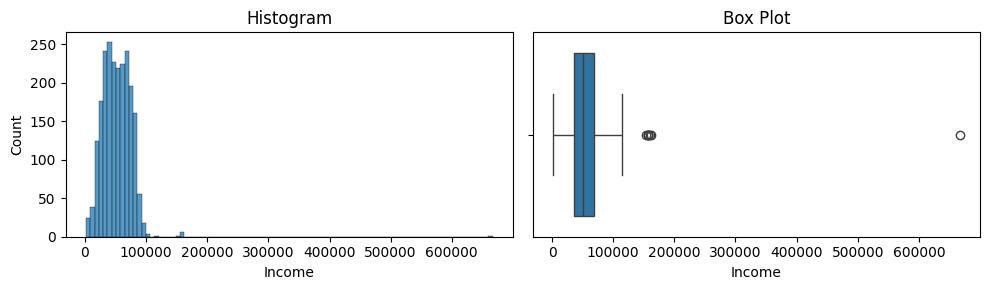

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(data=df, x='Income', ax=axes[0])
axes[0].set_title('Histogram')

sns.boxplot(data=df, x='Income', ax=axes[1])
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.show()

In [17]:
df['Income_imputed_mean'] = df['Income'].fillna(df['Income'].mean())
df['Income_imputed_median'] = df['Income'].fillna(df['Income'].median())
df['Income_imputed_mode'] = df['Income'].fillna(df['Income'].mode()[0])

In [18]:
df['Income_imputed_mode'].isnull().sum()

np.int64(0)

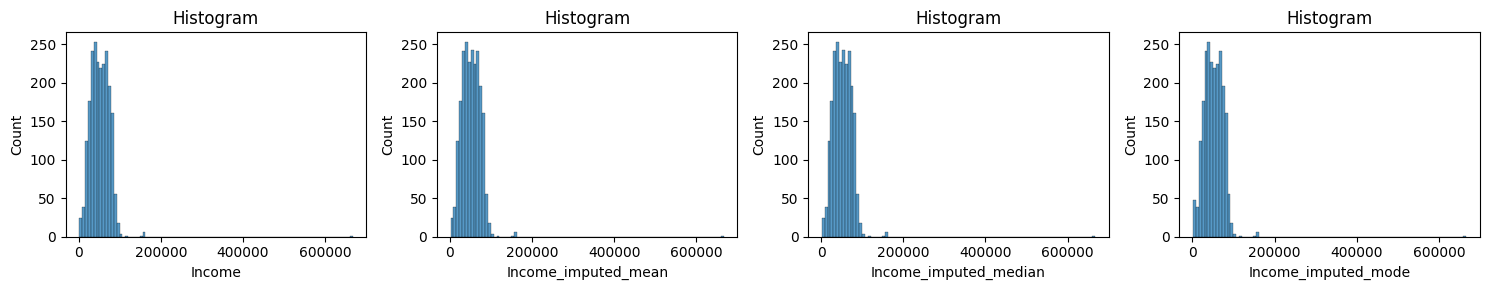

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# plt.boxplot(df['Income'])
# plt.hist(df['Income'], bins = 10);
sns.histplot(data=df, x='Income', ax=axes[0])
axes[0].set_title('Histogram')

sns.histplot(data=df, x='Income_imputed_mean', ax=axes[1])
axes[1].set_title('Histogram')

sns.histplot(data=df, x='Income_imputed_median', ax=axes[2])
axes[2].set_title('Histogram')

sns.histplot(data=df, x='Income_imputed_mode', ax=axes[3])
axes[3].set_title('Histogram')

plt.tight_layout()
plt.show()

Note: When we impute null values with mean or median, the distribution of `Income` column change slightly while mode values don't change much
=> We will use mode to impute null values in `Income` column.

In [20]:
df['Income'] = df['Income'].fillna(df['Income'].mode()[0])
df = df.drop(columns=['Income_imputed_mean', 'Income_imputed_median', 'Income_imputed_mode']);

In [21]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2237 non-null   int64  
 1   Year_Birth         2237 non-null   int64  
 2   Education          2237 non-null   str    
 3   Marital_Status     2237 non-null   str    
 4   Income             2237 non-null   float64
 5   Kidhome            2237 non-null   int64  
 6   Teenhome           2237 non-null   int64  
 7   EnrolmentDate      2237 non-null   str    
 8   Recency            2237 non-null   int64  
 9   CntWines           2237 non-null   int64  
 10  CntFruits          2237 non-null   int64  
 11  CntMeatProducts    2237 non-null   int64  
 12  CntFishProducts    2237 non-null   int64  
 13  CntSweetProducts   2237 non-null   int64  
 14  CntPremiumProds    2237 non-null   int64  
 15  CntPremiumProds.1  2237 non-null   int64  
 16  NumDealsPurchases  2237 non-null   

### Check column names (Slide 3)

In [22]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(exclude='number').columns.tolist()

print("All columns:", df.columns)
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

All columns: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'EnrolmentDate', 'Recency', 'CntWines', 'CntFruits',
       'CntMeatProducts', 'CntFishProducts', 'CntSweetProducts',
       'CntPremiumProds', 'CntPremiumProds.1', 'NumDealsPurchases',
       'NumWebPurchases', 'NumAppPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'NumCampaign'],
      dtype='str')
Numeric columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'CntWines', 'CntFruits', 'CntMeatProducts', 'CntFishProducts', 'CntSweetProducts', 'CntPremiumProds', 'CntPremiumProds.1', 'NumDealsPurchases', 'NumWebPurchases', 'NumAppPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'NumCampaign']
Categorical columns: ['Education', 'Marital_Status', 'EnrolmentDate']


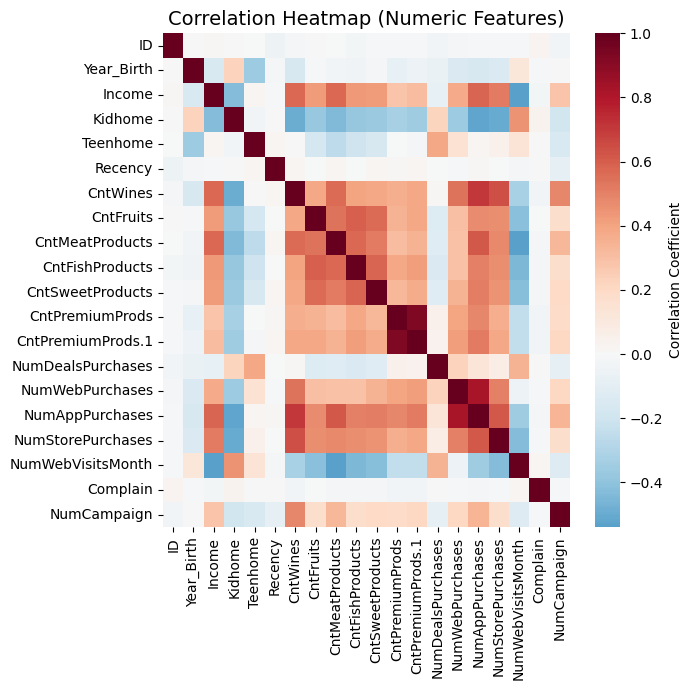

In [23]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap='RdBu_r', center=0, annot=False, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap (Numeric Features)', fontsize=14)
plt.tight_layout()
plt.show()


In [24]:
print('Check Correlation between Income & CntPremiumProds:')
print(df[['Income', 'CntPremiumProds']].corr(), '\n')

print('Check Correlation between Income & CntPremiumProds.1:')
print(df[['Income', 'CntPremiumProds.1']].corr())

Check Correlation between Income & CntPremiumProds:
                   Income  CntPremiumProds
Income           1.000000         0.287493
CntPremiumProds  0.287493         1.000000 

Check Correlation between Income & CntPremiumProds.1:
                     Income  CntPremiumProds.1
Income             1.000000           0.313902
CntPremiumProds.1  0.313902           1.000000


In [25]:
df = df.drop(columns=['CntPremiumProds'])
df.rename(columns={'CntPremiumProds.1':'CntPremiumProds'},inplace=True)

### Handle incorrect data types (Slide 3)

In [26]:
df['EnrolmentDate'] = pd.to_datetime(df['EnrolmentDate'], dayfirst=True, errors='coerce')

### Feature Engineering (Slide 3)

In [27]:
cnt_products = ['CntWines', 'CntFruits', 'CntMeatProducts', 
                 'CntFishProducts', 'CntSweetProducts', 'CntPremiumProds']
num_purchases = ['NumWebPurchases', 'NumAppPurchases', 'NumStorePurchases']

df['CntTotalProducts'] = df[cnt_products].sum(axis=1)
df['TotalPurchases'] = df[num_purchases].sum(axis=1)
df['ProductPerPurchase'] = df['CntTotalProducts'] / df['TotalPurchases']
df['KidTeenHome'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2024 - df['Year_Birth']
df['RegisterDay'] = (pd.to_datetime('2024-07-31') - df['EnrolmentDate']).dt.days.astype(int)

### Handle data abnormality (Slide 3)

In [28]:
# Check data - Quick summary of all numerical columns
df.describe()

/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas/core/nanops.py:1020: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ID,Year_Birth,Income,Kidhome,Teenhome,EnrolmentDate,Recency,CntWines,CntFruits,CntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,NumCampaign,CntTotalProducts,TotalPurchases,ProductPerPurchase,KidTeenHome,Age,RegisterDay
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1978.901654,51756.618239,0.444345,0.506482,2023-07-11 18:00:48.278945,49.104604,303.995530,26.270451,166.916853,...,5.794367,5.319177,0.008941,0.447027,605.743406,16.631203,inf,0.950827,45.098346,385.249441
min,0.000000,1950.000000,1730.000000,0.000000,0.000000,2022-01-07 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,18.000000,-127.000000
25%,2829.000000,1969.000000,34704.000000,0.000000,0.000000,2023-01-19 00:00:00,24.000000,24.000000,1.000000,16.000000,...,3.000000,3.000000,0.000000,0.000000,69.000000,8.000000,9.714286,0.000000,37.000000,214.000000
50%,5455.000000,1980.000000,51039.000000,0.000000,0.000000,2023-07-11 00:00:00,49.000000,174.000000,8.000000,67.000000,...,5.000000,6.000000,0.000000,0.000000,396.000000,17.000000,21.250000,1.000000,44.000000,386.000000
75%,8427.000000,1987.000000,68281.000000,1.000000,1.000000,2023-12-30 00:00:00,74.000000,504.000000,33.000000,232.000000,...,8.000000,7.000000,0.000000,1.000000,1045.000000,24.000000,40.342105,1.000000,55.000000,559.000000
max,11191.000000,2006.000000,666666.000000,2.000000,2.000000,2024-12-05 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,13.000000,20.000000,1.000000,5.000000,2525.000000,54.000000,inf,3.000000,74.000000,936.000000
std,3245.118591,11.701917,25463.866620,0.538467,0.544593,NaN,28.956073,336.574382,39.715972,225.661158,...,3.250940,2.426386,0.094152,0.890964,601.840466,9.503853,NaN,0.752037,11.701917,232.282484


In [29]:
df[(((df['RegisterDay'] - df['Recency']) <0))][['ID','Age','Education','Recency', 'EnrolmentDate', 'RegisterDay', 'Marital_Status','CntTotalProducts','TotalPurchases', 'NumDealsPurchases']].info()

<class 'pandas.DataFrame'>
Index: 165 entries, 1 to 2233
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 165 non-null    int64         
 1   Age                165 non-null    int64         
 2   Education          165 non-null    str           
 3   Recency            165 non-null    int64         
 4   EnrolmentDate      165 non-null    datetime64[us]
 5   RegisterDay        165 non-null    int64         
 6   Marital_Status     165 non-null    str           
 7   CntTotalProducts   165 non-null    int64         
 8   TotalPurchases     165 non-null    int64         
 9   NumDealsPurchases  165 non-null    int64         
dtypes: datetime64[us](1), int64(7), str(2)
memory usage: 14.2 KB


In [30]:
df[((df['RegisterDay'] <0)) | ((df['TotalPurchases'] == 0) & (df['CntTotalProducts'] > 0))][['ID','Age','Income','Education','Recency', 'EnrolmentDate', 'RegisterDay', 'Marital_Status','CntTotalProducts','TotalPurchases', 'NumDealsPurchases']].describe()
# df = df[~((df['TotalPurchases'] == 0) & (df['CntTotalProducts'] > 0))]

,ID,Age,Income,Recency,EnrolmentDate,RegisterDay,CntTotalProducts,TotalPurchases,NumDealsPurchases
count,103.000000,103.000000,103.000000,103.000000,103,103.000000,103.000000,103.000000,103.000000
mean,6066.456311,44.766990,52534.446602,46.339806,2024-09-27 10:43:06.407767,-58.446602,417.582524,12.883495,2.009709
min,49.000000,19.000000,1730.000000,0.000000,2023-04-13 00:00:00,-127.000000,5.000000,0.000000,0.000000
25%,3407.500000,37.000000,34377.000000,22.000000,2024-09-01 12:00:00,-96.000000,40.000000,5.500000,1.000000
50%,6182.000000,44.000000,49187.000000,46.000000,2024-10-04 00:00:00,-65.000000,89.000000,9.000000,1.000000
75%,8920.500000,51.500000,66347.000000,70.000000,2024-11-04 00:00:00,-32.500000,641.000000,22.000000,2.000000
max,11181.000000,68.000000,156924.000000,99.000000,2024-12-05 00:00:00,475.000000,2349.000000,37.000000,15.000000
std,3318.435504,11.265254,26171.989398,28.311833,NaN,81.533673,555.346518,9.031862,2.211801


In [31]:
df[((df['RegisterDay'] - df['Recency']) <0) | ((df['RegisterDay'] <0)) | ((df['TotalPurchases'] == 0) & (df['CntTotalProducts'] > 0))][['ID','Age','Education','Recency', 'EnrolmentDate', 'RegisterDay', 'Marital_Status','CntTotalProducts','TotalPurchases', 'NumDealsPurchases']]
# df = df[~((df['TotalPurchases'] == 0) & (df['CntTotalProducts'] > 0))]

,ID,Age,Education,Recency,EnrolmentDate,RegisterDay,Marital_Status,CntTotalProducts,TotalPurchases,NumDealsPurchases
1,2174,60,Graduation,38,2024-08-02,-2,Single,27,5,2
3,6182,30,Graduation,26,2024-10-01,-62,Married,53,8,2
23,4047,60,PhD,0,2024-10-31,-92,Married,544,23,3
38,8595,41,Graduation,99,2024-11-01,-93,Widow,67,6,2
45,1371,38,Graduation,72,2024-06-27,34,Single,984,17,1
...,...,...,...,...,...,...,...,...,...,...
2184,5721,58,PhD,60,2024-11-04,-96,Married,1566,30,1
2185,10652,57,Master,48,2024-09-30,-61,Married,1169,17,3
2196,9014,39,Graduation,65,2024-06-25,36,Married,61,9,4
2221,4286,44,PhD,24,2024-08-31,-31,Single,679,26,3


In [32]:
df = df[~(((df['RegisterDay'] - df['Recency']) <0) | (df['RegisterDay'] <0) | ((df['TotalPurchases'] == 0) & (df['CntTotalProducts'] > 0)))]
df.info()

<class 'pandas.DataFrame'>
Index: 2067 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  2067 non-null   int64         
 1   Year_Birth          2067 non-null   int64         
 2   Education           2067 non-null   str           
 3   Marital_Status      2067 non-null   str           
 4   Income              2067 non-null   float64       
 5   Kidhome             2067 non-null   int64         
 6   Teenhome            2067 non-null   int64         
 7   EnrolmentDate       2067 non-null   datetime64[us]
 8   Recency             2067 non-null   int64         
 9   CntWines            2067 non-null   int64         
 10  CntFruits           2067 non-null   int64         
 11  CntMeatProducts     2067 non-null   int64         
 12  CntFishProducts     2067 non-null   int64         
 13  CntSweetProducts    2067 non-null   int64         
 14  CntPremi

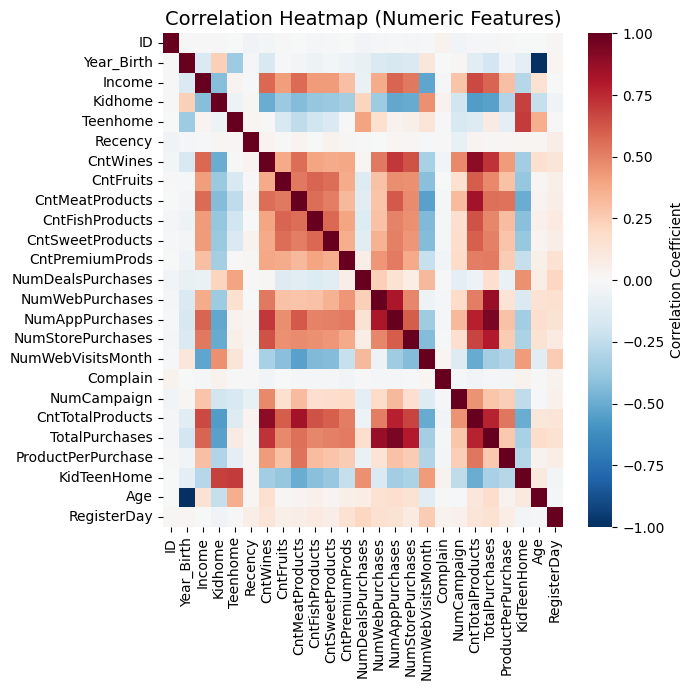

In [33]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap='RdBu_r', center=0, annot=False, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap (Numeric Features)', fontsize=14)
plt.tight_layout()
plt.show()


## 2. Descriptive Statistics (Slide 4-5)

### Check basic statistics of columns (Slide 4)

In [34]:
desc = df[['Income']].describe()
desc.loc['skew'] = df['Income'].skew()
desc_transposed = desc.T
desc_transposed

,count,mean,std,min,25%,50%,75%,max,skew
Income,2067.0,51567.012579,25610.25139,2447.0,34596.0,50943.0,68118.0,666666.0,6.845516


In [35]:
desc1 = round(df[['Age','Income','Recency', 'RegisterDay','KidTeenHome','CntTotalProducts','TotalPurchases','NumDealsPurchases','NumCampaign']].describe(),2)
desc1.loc['skew'] = df.skew(numeric_only=True)
desc1

,Age,Income,Recency,RegisterDay,KidTeenHome,CntTotalProducts,TotalPurchases,NumDealsPurchases,NumCampaign
count,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.00000,2067.000000,2067.000000
mean,45.060000,51567.010000,48.470000,418.370000,0.950000,616.390000,16.85000,2.350000,0.460000
std,11.790000,25610.250000,28.920000,208.330000,0.750000,604.350000,9.54000,1.930000,0.900000
min,18.000000,2447.000000,0.000000,27.000000,0.000000,8.000000,1.00000,0.000000,0.000000
25%,36.000000,34596.000000,24.000000,253.500000,0.000000,71.500000,8.00000,1.000000,0.000000
50%,44.000000,50943.000000,49.000000,415.000000,1.000000,405.000000,17.00000,2.000000,0.000000
75%,55.000000,68118.000000,73.500000,570.500000,1.000000,1063.000000,25.00000,3.000000,1.000000
max,74.000000,666666.000000,99.000000,936.000000,3.000000,2525.000000,54.00000,15.000000,5.000000
skew,0.099598,6.845516,0.016676,0.185176,0.416827,0.835313,0.32212,2.288991,2.411431


In [36]:
df = df[df['Income'] < df['Income'].quantile(0.995)]
# df = df[df['NumDealsPurchases'] < df['NumDealsPurchases'].quantile(0.99)]

In [37]:
desc2 = round(df[['Age','Income','Recency', 'RegisterDay','KidTeenHome','CntTotalProducts','TotalPurchases','NumDealsPurchases','NumCampaign']].describe(),2)
desc2.loc['skew'] = df.skew(numeric_only=True)
desc2

,Age,Income,Recency,RegisterDay,KidTeenHome,CntTotalProducts,TotalPurchases,NumDealsPurchases,NumCampaign
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.00000
mean,45.080000,50875.970000,48.530000,418.050000,0.950000,614.450000,16.810000,2.350000,0.45000
std,11.790000,20967.410000,28.910000,208.110000,0.750000,603.320000,9.480000,1.890000,0.89000
min,18.000000,2447.000000,0.000000,27.000000,0.000000,8.000000,1.000000,0.000000,0.00000
25%,36.000000,34547.750000,24.000000,253.750000,0.000000,71.000000,8.000000,1.000000,0.00000
50%,44.000000,50727.000000,49.000000,414.000000,1.000000,404.000000,17.000000,2.000000,0.00000
75%,55.000000,67689.000000,74.000000,571.000000,1.000000,1053.000000,24.000000,3.000000,1.00000
max,74.000000,98777.000000,99.000000,936.000000,3.000000,2525.000000,54.000000,15.000000,5.00000
skew,0.092245,-0.027523,0.011937,0.183997,0.414758,0.842572,0.304729,2.175997,2.40619


In [38]:
def age_group(x):
    if x <= 30:
        return '18-30'
    if x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 80:
        return '61-80'

df.loc[:, 'AgeGroup'] = df['Age'].apply(age_group)
df['AgeGroup'].value_counts()

AgeGroup
41-50    588
31-40    537
51-60    438
61-80    248
18-30    245
Name: count, dtype: int64

In [39]:
def have_childen(x):
    if x == 0:
        return 'No'
    elif x > 0:
        return 'Yes'

df.loc[:, 'HaveChildren'] = df['KidTeenHome'].apply(have_childen)
df['HaveChildren'].value_counts()

HaveChildren
Yes    1476
No      580
Name: count, dtype: int64

In [40]:
def retention_group(x):
    if x <= 15:
        return '≤15D'
    elif x <= 30:
        return '16-30D'
    elif x <= 60:
        return '31-60D'
    elif x <= 90:
        return '61-90D'
    elif x > 90:
        return '>90D'

df.loc[:, 'PurchaseRetention'] = df['Recency'].apply(retention_group)
df['PurchaseRetention'].value_counts()

PurchaseRetention
61-90D    604
31-60D    602
≤15D      354
16-30D    323
>90D      173
Name: count, dtype: int64

In [41]:
percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

cut_points = df['RegisterDay'].quantile(percentiles)
print(cut_points)

def register_group(x):
    if x <= 180:
        return '≤6 months'
    elif x <= 270:
        return '7-9 months'
    elif x <= 360:
        return '9-12 months'
    elif x <= 540:
        return '13-18 months'
    elif x > 540:
        return '>18 months'

df.loc[:, 'RegistrationTime'] = df['RegisterDay'].apply(register_group)
df['RegistrationTime'].value_counts()

0.0     27.0
0.2    220.0
0.4    346.0
0.6    481.0
0.8    610.0
1.0    936.0
Name: RegisterDay, dtype: float64


RegistrationTime
>18 months      609
13-18 months    584
≤6 months       305
9-12 months     289
7-9 months      269
Name: count, dtype: int64

In [42]:
percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

cut_points = df['Income'].quantile(percentiles)
print(cut_points)

def income_group(x):
    if x <= 30000:
        return '≤30K'
    elif x <= 45000:
        return '31-45K'
    elif x <= 55000:
        return '46-55K'
    elif x <= 70000:
        return '56-70K'
    elif x > 70000:
        return '>70K'

df.loc[:, 'IncomeGroup'] = df['Income'].apply(income_group)
df['IncomeGroup'].value_counts()

0.0     2447.0
0.2    31089.0
0.4    43638.0
0.6    57867.0
0.8    71107.0
1.0    98777.0
Name: Income, dtype: float64


IncomeGroup
31-45K    494
56-70K    455
>70K      450
≤30K      368
46-55K    289
Name: count, dtype: int64

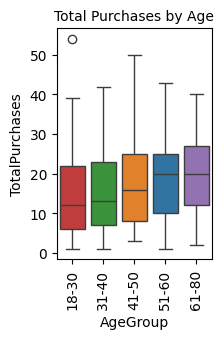

In [43]:
plt.figure(figsize=(2,3))

sns.boxplot(data=df, x='AgeGroup', y='TotalPurchases', hue='AgeGroup', order=['18-30','31-40','41-50','51-60','61-80'])
plt.legend([], [], frameon=False)   # hides the legend
plt.title('Total Purchases by Age', fontsize=10)
plt.xlabel('AgeGroup', fontsize=10)
plt.ylabel('TotalPurchases', fontsize=10)
plt.xticks(rotation=90)
plt.show()

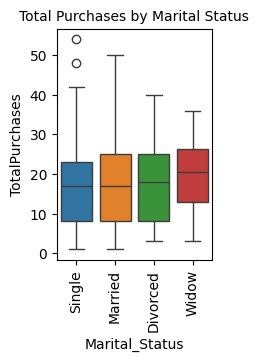

In [44]:
plt.figure(figsize=(2,3))

sns.boxplot(data=df, x='Marital_Status', y='TotalPurchases', hue='Marital_Status', order=['Single', 'Married', 'Divorced', 'Widow'])
plt.legend([], [], frameon=False)   # hides the legend
plt.title('Total Purchases by Marital Status', fontsize=10)
plt.xlabel('Marital_Status', fontsize=10)
plt.ylabel('TotalPurchases', fontsize=10)
# plt.ylabel(None)
plt.xticks(rotation=90)
plt.show()

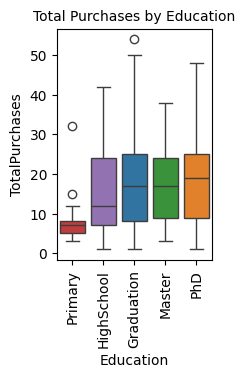

In [45]:
plt.figure(figsize=(2,3))

sns.boxplot(data=df, x='Education', y='TotalPurchases', hue='Education', order=['Primary', 'HighSchool', 'Graduation', 'Master', 'PhD'])
plt.legend([], [], frameon=False)   # hides the legend
plt.title('Total Purchases by Education', fontsize=10)
plt.xlabel('Education', fontsize=10)
plt.ylabel('TotalPurchases', fontsize=10)
# plt.ylabel(None)
plt.xticks(rotation=90)
plt.show()

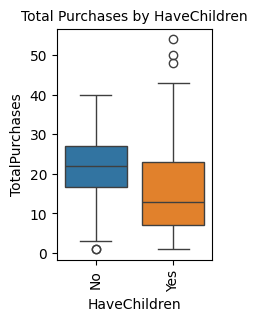

In [46]:
plt.figure(figsize=(2,3))

sns.boxplot(data=df, x='HaveChildren', y='TotalPurchases', hue='HaveChildren', order=['No', 'Yes'])
plt.legend([], [], frameon=False)   # hides the legend
plt.title('Total Purchases by HaveChildren', fontsize=10)
plt.xlabel('HaveChildren', fontsize=10)
plt.ylabel('TotalPurchases', fontsize=10)
# plt.ylabel(None)
plt.xticks(rotation=90)
plt.show()

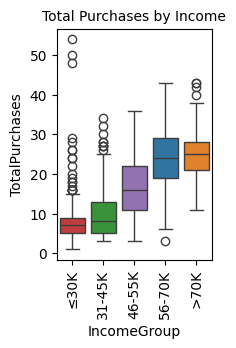

In [47]:
plt.figure(figsize=(2,3))

sns.boxplot(data=df, x='IncomeGroup', y='TotalPurchases', hue='IncomeGroup', order=['≤30K', '31-45K', '46-55K', '56-70K', '>70K'])
plt.legend([], [], frameon=False)   # hides the legend
plt.title('Total Purchases by Income', fontsize=10)
plt.xlabel('IncomeGroup', fontsize=10)
plt.ylabel('TotalPurchases', fontsize=10)
# plt.ylabel(None)
plt.xticks(rotation=90)
plt.show()

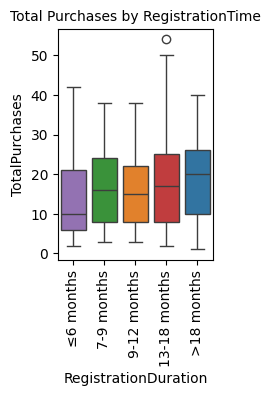

In [48]:
plt.figure(figsize=(2,3))

sns.boxplot(data=df, x='RegistrationTime', y='TotalPurchases', hue='RegistrationTime', order=['≤6 months','7-9 months', '9-12 months', '13-18 months', '>18 months'])
plt.legend([], [], frameon=False)   # hides the legend
plt.title('Total Purchases by RegistrationTime', fontsize=10)
plt.xlabel('RegistrationDuration', fontsize=10)
plt.ylabel('TotalPurchases', fontsize=10)
# plt.ylabel(None)
plt.xticks(rotation=90)
plt.show()

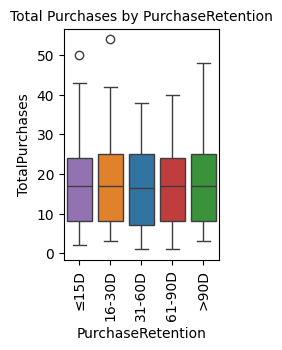

In [49]:
plt.figure(figsize=(2,3))

sns.boxplot(data=df, x='PurchaseRetention', y='TotalPurchases', hue='PurchaseRetention', order=['≤15D', '16-30D', '31-60D', '61-90D', '>90D'])
plt.legend([], [], frameon=False)   # hides the legend
plt.title('Total Purchases by PurchaseRetention', fontsize=10)
plt.xlabel('PurchaseRetention', fontsize=10)
plt.ylabel('TotalPurchases', fontsize=10)
# plt.ylabel(None)
plt.xticks(rotation=90)
plt.show()

### Descriptive Statistics P2 (Slide 5)

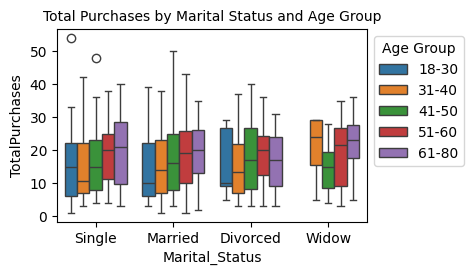

In [50]:
plt.figure(figsize=(4, 2.5))

sns.boxplot(data=df, x='Marital_Status', y='TotalPurchases', hue='AgeGroup', hue_order=['18-30','31-40','41-50','51-60','61-80'])
plt.title('Total Purchases by Marital Status and Age Group', fontsize=10)
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.show()

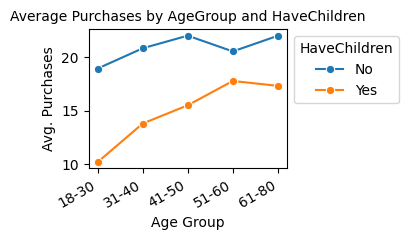

In [51]:
avg_num = df.groupby(['AgeGroup', 'HaveChildren'])['TotalPurchases'].mean().reset_index()

plt.figure(figsize=(4,2.5))
sns.lineplot(data=avg_num,x='AgeGroup',y='TotalPurchases',hue='HaveChildren', marker='o', sort=['18-30','31-40','41-50','51-60','61-80'], hue_order=['No', 'Yes'])

plt.title('Average Purchases by AgeGroup and HaveChildren', fontsize=10)
plt.ylabel('Avg. Purchases')
plt.xlabel('Age Group')
plt.xticks(rotation=30, ha='right')
plt.legend(title='HaveChildren', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()


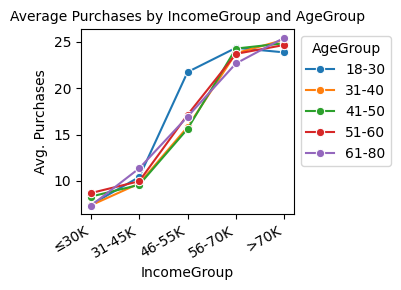

In [52]:
avg_num = df.groupby(['IncomeGroup', 'AgeGroup'])['TotalPurchases'].mean().reset_index()
order_income = ['≤30K', '31-45K', '46-55K', '56-70K', '>70K']

avg_num['IncomeGroup'] = pd.Categorical(avg_num['IncomeGroup'], categories=order_income, ordered=True)

plt.figure(figsize=(4,3))
sns.lineplot(data=avg_num,x='IncomeGroup',y='TotalPurchases',hue='AgeGroup', marker='o', hue_order=['18-30','31-40','41-50','51-60','61-80'])

plt.title('Average Purchases by IncomeGroup and AgeGroup', fontsize=10)
plt.ylabel('Avg. Purchases')
plt.xlabel('IncomeGroup')
plt.xticks(rotation=30, ha='right')
plt.legend(title='AgeGroup', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()


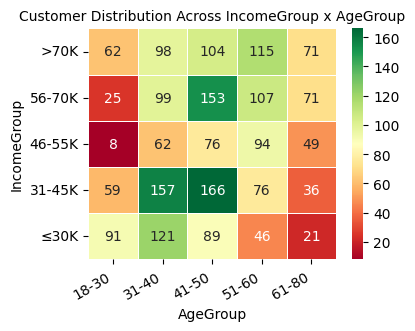

In [53]:
# Pivot the data to count occurrences instead of averaging price_per_sqm
heatmap_data = df.pivot_table(index="IncomeGroup", columns="AgeGroup", values="TotalPurchases", aggfunc="count", observed=True)

order_income = ['>70K','56-70K','46-55K','31-45K','≤30K']
order_age =['18-30','31-40','41-50','51-60','61-80']

heatmap_data = heatmap_data.reindex(index=order_income, columns=order_age)

# Create the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="RdYlGn", linewidths=0.5, cbar=True)

# Set labels and title
plt.title("Customer Distribution Across IncomeGroup x AgeGroup", fontsize=10)
plt.xlabel("AgeGroup", fontsize=10)
plt.xticks(rotation=30, ha='right')
plt.ylabel("IncomeGroup", fontsize=10)

# Show the plot
plt.show()

### Descriptive Statistics P3 (Slide 6)

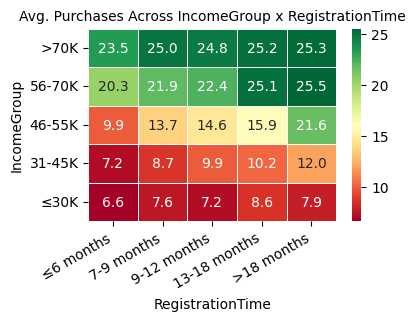

In [54]:
# Pivot the data to count occurrences instead of averaging price_per_sqm
heatmap_data = df.pivot_table(index="IncomeGroup", columns="RegistrationTime", values="TotalPurchases", aggfunc="mean", observed=True)

order_income = ['>70K','56-70K','46-55K','31-45K','≤30K']
order_register =['≤6 months', '7-9 months', '9-12 months', '13-18 months', '>18 months']

heatmap_data = heatmap_data.reindex(index=order_income, columns=order_register)

# Create the heatmap
plt.figure(figsize=(4, 2.5))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="RdYlGn", linewidths=0.5, cbar=True)

# Set labels and title
plt.title("Avg. Purchases Across IncomeGroup x RegistrationTime", fontsize=10)
plt.xlabel("RegistrationTime", fontsize=10)
plt.xticks(rotation=30, ha='right')
plt.ylabel("IncomeGroup", fontsize=10)

# Show the plot
plt.show()

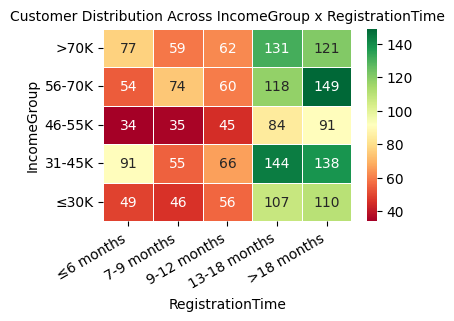

In [55]:
# Pivot the data to count occurrences instead of averaging price_per_sqm
heatmap_data = df.pivot_table(index="IncomeGroup", columns="RegistrationTime", values="TotalPurchases", aggfunc="count", observed=True)

order_income = ['>70K','56-70K','46-55K','31-45K','≤30K']
order_register =['≤6 months', '7-9 months', '9-12 months', '13-18 months', '>18 months']

heatmap_data = heatmap_data.reindex(index=order_income, columns=order_register)

# Create the heatmap
plt.figure(figsize=(4, 2.5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="RdYlGn", linewidths=0.5, cbar=True)

# Set labels and title
plt.title("Customer Distribution Across IncomeGroup x RegistrationTime", fontsize=10)
plt.xlabel("RegistrationTime", fontsize=10)
plt.xticks(rotation=30, ha='right')
plt.ylabel("IncomeGroup", fontsize=10)

# Show the plot
plt.show()

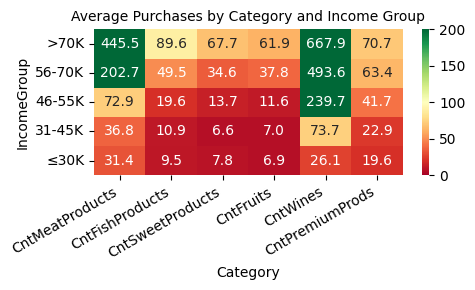

In [56]:
# categories already in your dataset (counts per 2 yrs)
chosen_cols = ['CntMeatProducts','CntFishProducts','CntSweetProducts','CntFruits','CntWines','CntPremiumProds']

# (optional) order the income groups if you have labels like P0-20, P21-40, ...
order_income = ['>70K','56-70K','46-55K','31-45K','≤30K']

# build the matrix: rows = income group, cols = categories, values = mean counts
mat = (df.groupby('IncomeGroup', observed=True)[chosen_cols].mean().reindex(order_income))

plt.figure(figsize=(5,3))
sns.heatmap(mat, annot=True, fmt=".1f", cmap="RdYlGn", vmin=0, vmax=200)

# Set labels and title
plt.title("Average Purchases by Category and Income Group", fontsize=10)
plt.xlabel("Category", fontsize=10)
plt.xticks(rotation=30, ha='right')
plt.ylabel("IncomeGroup", fontsize=10)
plt.tight_layout()
plt.show()


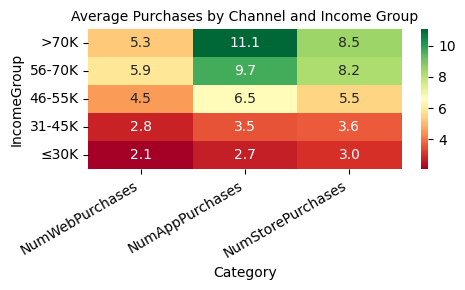

In [57]:
# categories already in your dataset (counts per 2 yrs)
chosen_cols = ['NumWebPurchases','NumAppPurchases','NumStorePurchases']

# (optional) order the income groups if you have labels like P0-20, P21-40, ...
# income_order = ['P0-20','P21-40','P41-60','P61-80','P81-100']
order_income = ['>70K','56-70K','46-55K','31-45K','≤30K']

# build the matrix: rows = income group, cols = categories, values = mean counts
mat = (df.groupby('IncomeGroup', observed=True)[chosen_cols].mean().reindex(order_income))

plt.figure(figsize=(5,3))
sns.heatmap(mat, annot=True, fmt=".1f", cmap="RdYlGn")

# Set labels and title
plt.title("Average Purchases by Channel and Income Group", fontsize=10)
plt.xlabel("Category", fontsize=10)
plt.xticks(rotation=30, ha='right')
plt.ylabel("IncomeGroup", fontsize=10)
plt.tight_layout()
plt.show()

## Inferential Statistics (Slide 7-8)

### Inferential Statistics (P1) (Slide 7)

In [58]:
# Function to calculate confidence interval and standard deviation
def mean_ci(data, confidence=0.95):
    n = data.count()
    mean = data.mean()
    std = data.std()
    se = std / np.sqrt(n)  # standard error
    h = stats.t.ppf((1 + confidence) / 2, n - 1) * se
    return pd.Series({'Sample Size': n, 'Lower CI': round(mean - h, 1), 'Upper CI': round(mean + h, 1), 'Standard Deviation': round(std, 1)})

# Group dataset into IncomeGroup and RegistrationTime
ci_table = df.groupby(['IncomeGroup', 'RegistrationTime'])['TotalPurchases'].apply(mean_ci).unstack().reset_index()

# Custom sort based on IncomeGroup and RegistrationTime
income_order = ['≤30K', '31-45K', '46-55K', '56-70K', '>70K']
register_order = ['≤6 months', '7-9 months', '9-12 months', '13-18 months', '>18 months']
ci_table['IncomeGroup'] = pd.Categorical(ci_table['IncomeGroup'], categories=income_order, ordered=True)
ci_table['RegistrationTime'] = pd.Categorical(ci_table['RegistrationTime'], categories=register_order, ordered=True)
ci_table = ci_table.sort_values(['IncomeGroup', 'RegistrationTime']).reset_index(drop=True)

ci_table['Sample Size'] = ci_table['Sample Size'].astype(int)

pd.options.display.float_format = '{:.2f}'.format
print(ci_table.to_string(index=False))

IncomeGroup RegistrationTime  Sample Size  Lower CI  Upper CI  Standard Deviation
       ≤30K        ≤6 months           49      6.00      7.30                2.20
       ≤30K       7-9 months           46      6.30      8.80                4.20
       ≤30K      9-12 months           56      6.20      8.30                4.00
       ≤30K     13-18 months          107      7.00     10.20                8.20
       ≤30K       >18 months          110      7.00      8.70                4.40
     31-45K        ≤6 months           91      6.50      7.80                3.10
     31-45K       7-9 months           55      7.60      9.80                4.20
     31-45K      9-12 months           66      8.50     11.30                5.80
     31-45K     13-18 months          144      9.30     11.10                5.60
     31-45K       >18 months          138     10.80     13.10                6.80
     46-55K        ≤6 months           34      8.20     11.60                5.00
     46-55K     

### Inferential Statistics (P2) (Slide 8)

In [59]:
def coupon_accepted(x):
    if x <= 0:
        return 'Yes'
    elif x >0:
        return 'No'

df.loc[:, 'Coupon_Accepted'] = df['NumCampaign'].apply(coupon_accepted)
df['Coupon_Accepted'].value_counts()

Coupon_Accepted
Yes    1496
No      560
Name: count, dtype: int64

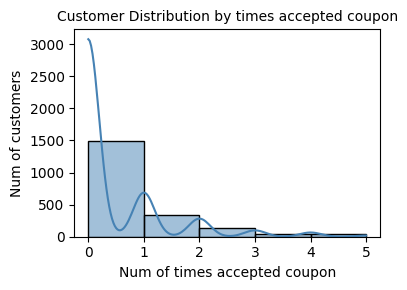

In [60]:
plt.figure(figsize=(4, 3))
sns.histplot(df['NumCampaign'], bins=5, kde=True, color='steelblue')
plt.xlabel('Num of times accepted coupon',fontsize=10)
plt.ylabel('Num of customers',fontsize=10)
plt.title('Customer Distribution by times accepted coupon',fontsize=10)
plt.tight_layout()
plt.show()

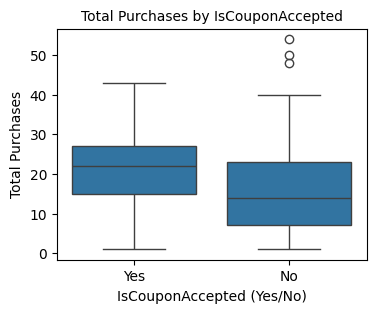

In [61]:
sub_df = df[['RegistrationTime','IncomeGroup','NumCampaign','TotalPurchases']].copy()

sub_df['IsCouponAccepted'] = np.where(sub_df['NumCampaign'] > 0, 'Yes', 'No')

plt.figure(figsize=(4,3))
sns.boxplot(data=sub_df, x='IsCouponAccepted', y='TotalPurchases')
plt.title('Total Purchases by IsCouponAccepted',fontsize=10)
plt.xlabel('IsCouponAccepted (Yes/No)',fontsize=10)
plt.ylabel('Total Purchases',fontsize=10)
plt.show()

In [62]:
from scipy.stats import mannwhitneyu, shapiro

sub_df = df[['RegistrationTime','IncomeGroup','NumCampaign','TotalPurchases']].copy()

sub_df['Coupon_Accepted'] = sub_df['NumCampaign'] > 0

# Test normality for reference (not required for Mann-Whitney U, but informative)
coupon_all = sub_df[sub_df['Coupon_Accepted']]['TotalPurchases']
no_coupon_all = sub_df[~sub_df['Coupon_Accepted']]['TotalPurchases']

stat_c, p_c = shapiro(coupon_all.sample(min(5000, len(coupon_all))))
stat_nc, p_nc = shapiro(no_coupon_all.sample(min(5000, len(no_coupon_all))))

print('Check normality via Shapiro-Wilk test:')
print(f"\n+ Coupon group - Shapiro-Wilk p-value: {p_c:.4f}")
print(f"+ No coupon group - Shapiro-Wilk p-value: {p_nc:.4f}")

Check normality via Shapiro-Wilk test:

+ Coupon group - Shapiro-Wilk p-value: 0.0000
+ No coupon group - Shapiro-Wilk p-value: 0.0000


Note: 
With p < 0.05, both Coupon group và No Coupon group is not normally distributed, confirming that using Mann-Whitney U is appropriate.

In [63]:
sub_df = df[['RegistrationTime','IncomeGroup','NumCampaign','TotalPurchases']].copy()

sub_df['Coupon_Accepted'] = sub_df['NumCampaign'] > 0

coupon = sub_df[sub_df['Coupon_Accepted']]['TotalPurchases']
no_coupon = sub_df[~sub_df['Coupon_Accepted']]['TotalPurchases']

t_stat, p_value = mannwhitneyu(coupon, no_coupon, alternative='two-sided')

median_no_coupon, median_coupon = no_coupon.median(), coupon.median()
# mean_no_coupon, mean_coupon = no_coupon.mean(), coupon.mean()
# sum_no_coupon, sum_coupon = no_coupon.sum(), coupon.sum()
percentage_diff = (median_coupon - median_no_coupon) / median_no_coupon * 100 if median_no_coupon != 0 else np.nan
if p_value < 0.05: 
  conclusion = 'Significant'
else:
  conclusion = 'Insignificant'

print(f"Result of applying Mann-Whitney U test:")
print(f"+ p-value: {p_value:.4f}")
print(f"+ u stat: {t_stat:.4f}")
print(f"+ Median No Coupon: {median_no_coupon:,.2f}")
print(f"+ Median Coupon: {median_coupon:,.2f}")
# print(f"+ Mean No Coupon: {mean_no_coupon:,.2f}")
# print(f"+ Mean Coupon: {mean_coupon:,.2f}")
print(f"+ Percentage Difference: {percentage_diff:.2f}%")
print(f"+ Conclusion:", conclusion)

Result of applying Mann-Whitney U test:
+ p-value: 0.0000
+ u stat: 558549.0000
+ Median No Coupon: 14.00
+ Median Coupon: 22.00
+ Percentage Difference: 57.14%
+ Conclusion: Significant


In [64]:
from scipy.stats import mannwhitneyu
import pandas as pd
import numpy as np

results = []
sub_df = df[['IncomeGroup','NumCampaign','TotalPurchases']].copy()

sub_df['Coupon_Accepted'] = sub_df['NumCampaign'] > 0
grouped = sub_df.groupby(['IncomeGroup'], observed=True)

for (IncomeGroup,), group in grouped:
    with_coupon = group.loc[group['Coupon_Accepted'], 'TotalPurchases']
    without_coupon = group.loc[~group['Coupon_Accepted'], 'TotalPurchases']
    
    n_with_coupon = len(with_coupon)
    n_without_coupon = len(without_coupon)
    sum_without_coupon, sum_with_coupon = without_coupon.sum(), with_coupon.sum()
       
    if n_without_coupon > 5 and n_with_coupon > 5:
        u_stat, p_value = mannwhitneyu(with_coupon, without_coupon, alternative='two-sided')
        
        median_without_coupon, median_with_coupon = without_coupon.median(), with_coupon.median()
        sum_without_coupon, sum_with_coupon = without_coupon.sum(), with_coupon.sum()
        percentage_diff = (median_with_coupon - median_without_coupon) / median_without_coupon * 100 if median_without_coupon != 0 else np.nan
        
        n_total = n_with_coupon + n_without_coupon

        results.append({
            'IncomeGroup': IncomeGroup,
            'n_coupon': n_with_coupon,
            'n_no_coupon': n_without_coupon,
            'median_coupon': median_with_coupon,
            'median_no_coupon': median_without_coupon,
            'pct_median_diff': percentage_diff,
            'u_stat': u_stat,
            'p_value': p_value,
            'conclusion': 'Significant' if (p_value < 0.05) else 'Not Significant'
        })
    else:
        # Include rows with too few samples
        results.append({
            'IncomeGroup': IncomeGroup,
            'n_coupon': n_with_coupon,
            'n_no_coupon': n_without_coupon,
            'median_coupon': np.nan,
            'median_no_coupon': np.nan,
            'pct_median_diff': np.nan,
            'u_stat': np.nan,
            # 'effect_size': np.nan,
            'p_value': np.nan,
            'conclusion': 'Too few samples'
        })

results_df = pd.DataFrame(results)

income_order = ['≤30K', '31-45K', '46-55K', '56-70K', '>70K']
results_df['IncomeGroup'] = pd.Categorical(results_df['IncomeGroup'], categories=income_order, ordered=True)
results_df = results_df.sort_values(['IncomeGroup']).reset_index(drop=True)

pd.options.display.float_format = '{:.2f}'.format
print(results_df.to_string(index=False))

IncomeGroup  n_coupon  n_no_coupon  median_coupon  median_no_coupon  pct_median_diff   u_stat  p_value      conclusion
       ≤30K        54          314           7.50              7.00             7.14  9511.50     0.15 Not Significant
     31-45K        97          397          11.00              8.00            37.50 24342.00     0.00     Significant
     46-55K        62          227          19.00             16.00            18.75  8967.50     0.00     Significant
     56-70K       114          341          25.00             24.00             4.17 21705.00     0.06 Not Significant
       >70K       233          217          25.00             24.00             4.17 27619.00     0.09 Not Significant


In [65]:
results = []
sub_df = df[['RegistrationTime','IncomeGroup','NumCampaign','TotalPurchases']].copy()

sub_df['Coupon_Accepted'] = sub_df['NumCampaign'] > 0
grouped = sub_df.groupby(['RegistrationTime', 'IncomeGroup'], observed=True)

for (RegistrationTime,IncomeGroup), group in grouped:
    with_coupon = group.loc[group['Coupon_Accepted'], 'TotalPurchases']
    without_coupon = group.loc[~group['Coupon_Accepted'], 'TotalPurchases']
    
    n_with_coupon = len(with_coupon)
    n_without_coupon = len(without_coupon)
    sum_without_coupon, sum_with_coupon = without_coupon.sum(), with_coupon.sum()
       
    if n_without_coupon > 5 and n_with_coupon > 5:
        u_stat, p_value = mannwhitneyu(with_coupon, without_coupon, alternative='two-sided')
        
        median_without_coupon, median_with_coupon = without_coupon.median(), with_coupon.median()
        sum_without_coupon, sum_with_coupon = without_coupon.sum(), with_coupon.sum()
        percentage_diff = (median_with_coupon - median_without_coupon) / median_without_coupon * 100 if median_without_coupon != 0 else np.nan
        
        n_total = n_with_coupon + n_without_coupon

        results.append({
            'IncomeGroup': IncomeGroup,
            'RegistrationTime': RegistrationTime,
            'n_coupon': n_with_coupon,
            'n_no_coupon': n_without_coupon,
            'median_coupon': median_with_coupon,
            'median_no_coupon': median_without_coupon,
            'pct_median_diff': percentage_diff,
            'u_stat': u_stat,
            'p_value': p_value,
            'conclusion': 'Significant' if (p_value < 0.05) else 'Not Significant'
        })
    else:
        results.append({
            'IncomeGroup': IncomeGroup,
            'RegistrationTime': RegistrationTime,
            'n_coupon': n_with_coupon,
            'n_no_coupon': n_without_coupon,
            'median_coupon': np.nan,
            'median_no_coupon': np.nan,
            'pct_median_diff': np.nan,
            'u_stat': np.nan,
            'p_value': np.nan,
            'conclusion': 'Too few samples'
        })

results_df = pd.DataFrame(results)

income_order = ['≤30K', '31-45K', '46-55K', '56-70K', '>70K']
register_order = ['≤6 months', '7-9 months', '9-12 months', '13-18 months', '>18 months']
results_df['IncomeGroup'] = pd.Categorical(results_df['IncomeGroup'], categories=income_order, ordered=True)
results_df['RegistrationTime'] = pd.Categorical(results_df['RegistrationTime'], categories=register_order, ordered=True)
results_df = results_df.sort_values(['IncomeGroup', 'RegistrationTime']).reset_index(drop=True)

pd.options.display.float_format = '{:.2f}'.format
print(results_df.to_string(index=False))

IncomeGroup RegistrationTime  n_coupon  n_no_coupon  median_coupon  median_no_coupon  pct_median_diff  u_stat  p_value      conclusion
       ≤30K        ≤6 months         5           44            NaN               NaN              NaN     NaN      NaN Too few samples
       ≤30K       7-9 months         4           42            NaN               NaN              NaN     NaN      NaN Too few samples
       ≤30K      9-12 months         8           48           7.50              5.50            36.36  235.00     0.31 Not Significant
       ≤30K     13-18 months        10           97           7.00              7.00             0.00  570.00     0.36 Not Significant
       ≤30K       >18 months        27           83           8.00              7.00            14.29 1172.50     0.72 Not Significant
     31-45K        ≤6 months        15           76           5.00              7.00           -28.57  404.00     0.07 Not Significant
     31-45K       7-9 months         5           50    